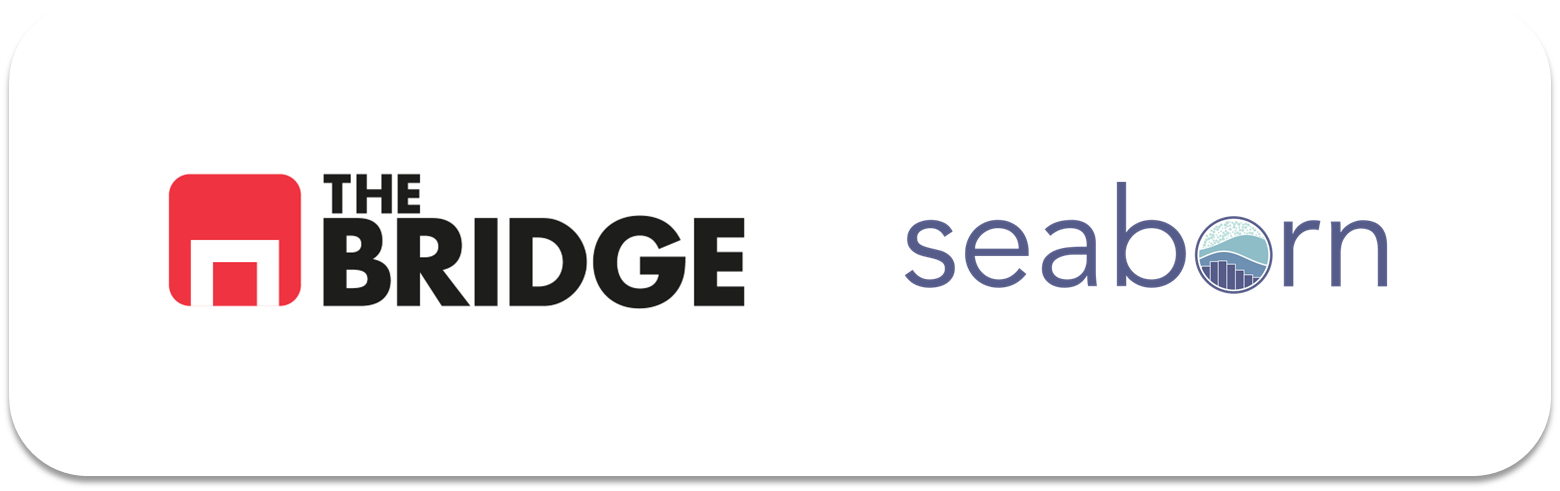

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
df_california = pd.read_csv("./data/california_cities.csv")
df_california_limpio = df_california.dropna()
df_california_limpio

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

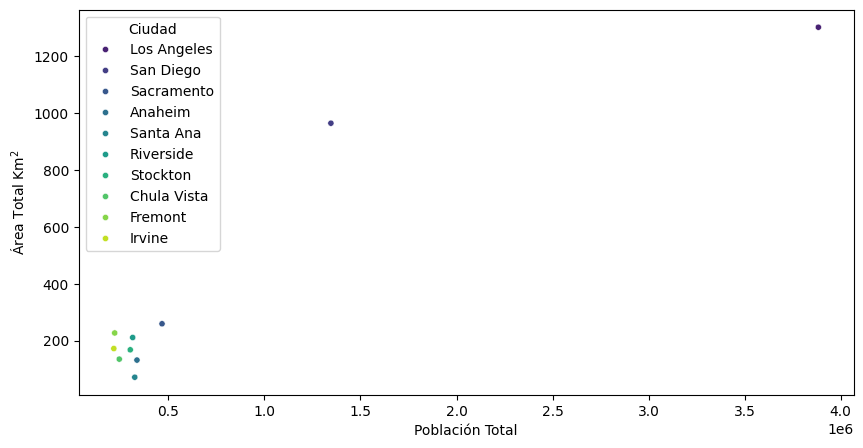

In [3]:
df_california_dispersion = df_california_limpio.nlargest(10, "population_total")[["city", "population_total", "area_total_km2"]]
df_california_dispersion = df_california_dispersion.rename(columns={"city": "Ciudad", "population_total": "Población Total", "area_total_km2": "Área Total Km$^2$"})
variable_numerica_1 = "Población Total"
variable_numerica_2 = "Área Total Km$^2$"
# Procesar los nombres de las ciudades para insertar espacios antes de cada mayúscula excepto el primer carácter
df_california_dispersion["Ciudad"] = df_california_dispersion["Ciudad"].apply(
    lambda x: re.sub(r'(?<!^)(?=[A-Z])', ' ', x)  # Añade espacio antes de cada mayúscula, excepto la primera
)
variable_categorica = df_california_dispersion["Ciudad"]

def dispersion_plot(df, num1, num2, cat=None, tam=20, escala=1):
    plt.figure(figsize=(10 * escala, 5 * escala))
    sns.scatterplot(data = df,
                    x= variable_numerica_1,
                    y= variable_numerica_2,
                    hue= cat,
                    s= tam,
                    palette= "viridis");

dispersion_plot(df_california_dispersion,variable_numerica_1,variable_numerica_2,variable_categorica,20);



### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

In [18]:
# Crear una nueva columna "log_poblacion" usando el logaritmo decimal
df_california_limpio.loc[:, "log_poblacion"] = np.log10(df_california_limpio["population_total"])


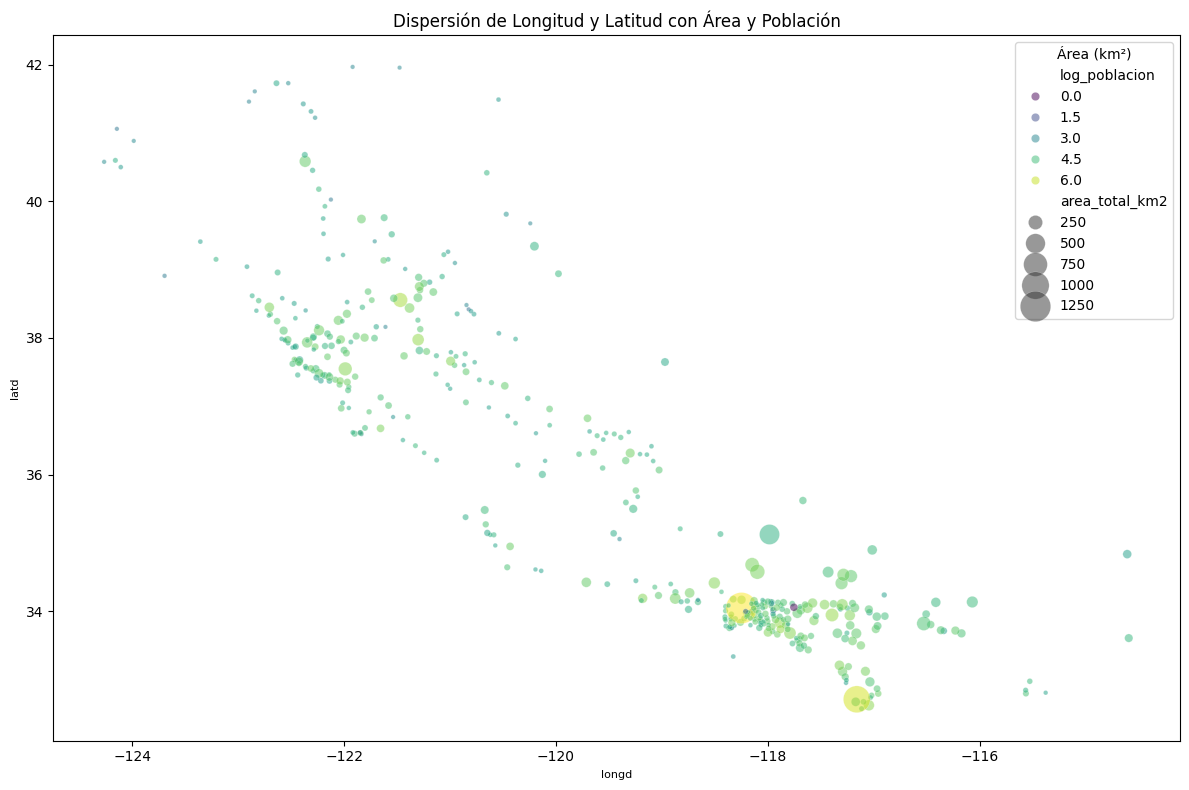

In [5]:
plt.figure(figsize=(12, 8))

# Crear diagrama de dispersión
scatter = sns.scatterplot(
    data=df_california_limpio,
    x="longd",
    y="latd",
    size="area_total_km2",  # Tamaño de los puntos según el área
    hue="log_poblacion",    # Colores según el log de la población
    palette="viridis",
    sizes=(10, 500),        # Tamaño mínimo y máximo de los puntos
    alpha=0.5               # Transparencia para mejor visualización
)

# Configuración del gráfico
scatter.set_title("Dispersión de Longitud y Latitud con Área y Población", fontsize=12)
scatter.set_xlabel("longd", fontsize=8)
scatter.set_ylabel("latd", fontsize=8)
plt.legend(title="Área (km²)")
plt.tight_layout()
plt.show()


Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

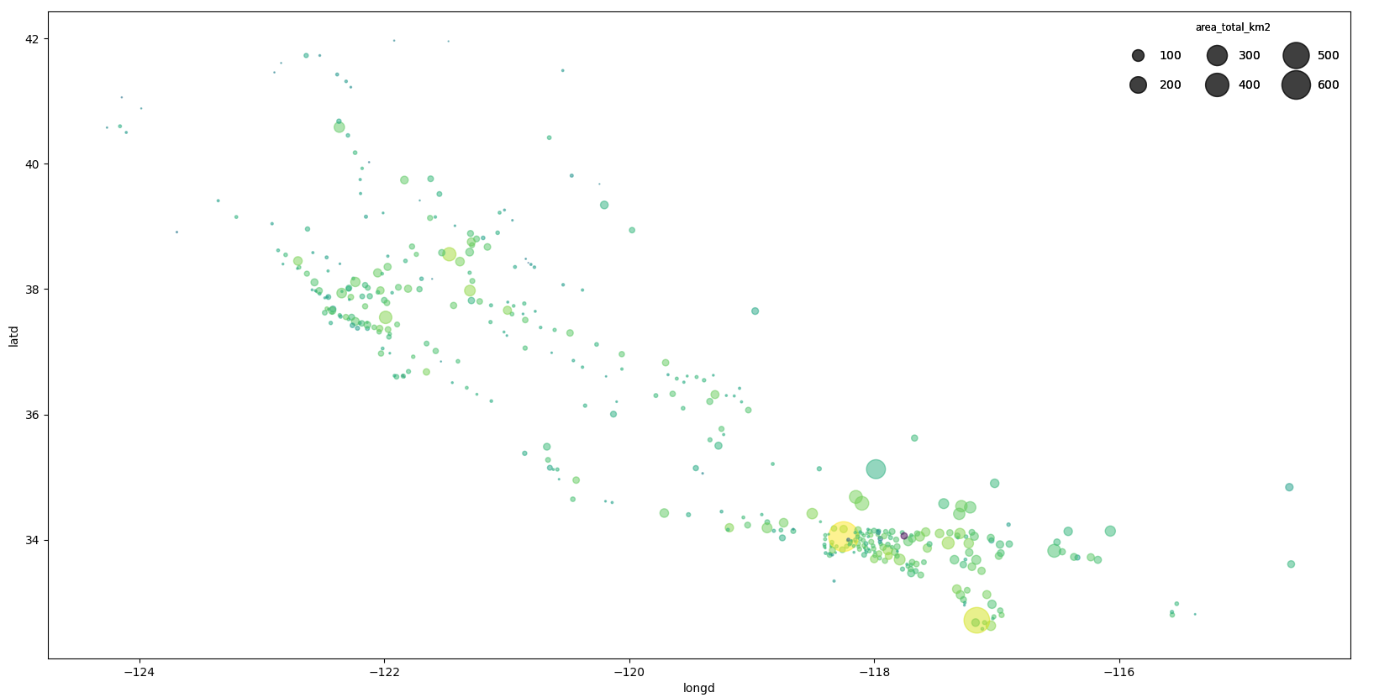

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [19]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic = df_california.dropna()
df_titanic

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


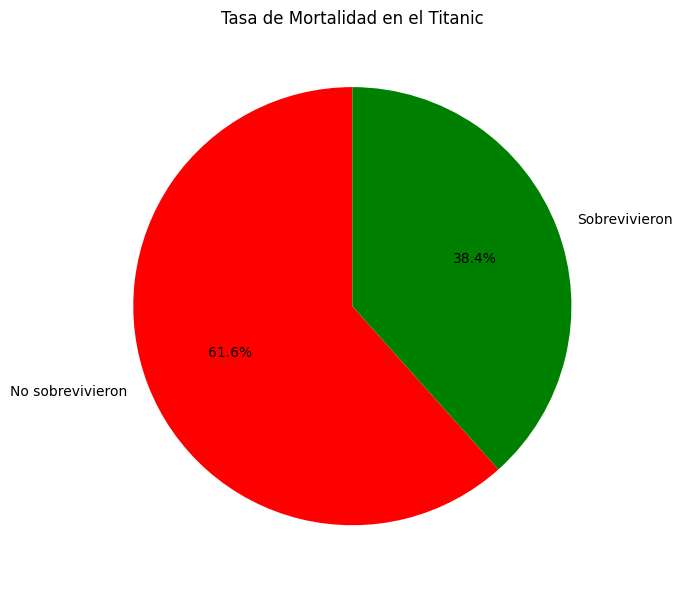

In [7]:
# 1- El titanic fue un accidente con una tasa de mortalidad alta.

# El Titanic fue un accidente con una tasa de mortalidad alta, con la mayoría de los pasajeros perdiendo la vida.

# Calcular el número de sobrevivientes y fallecidos
survival_counts = df_titanic["survived"].value_counts()
labels = ["No sobrevivieron", "Sobrevivieron"]

# Gráfico de torta para mostrar la proporción
fig = plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', colors=["red", "green"], startangle=90)
plt.title("Tasa de Mortalidad en el Titanic")
plt.tight_layout()
plt.show()


In [8]:
fig.savefig('./data/grafico1.png')

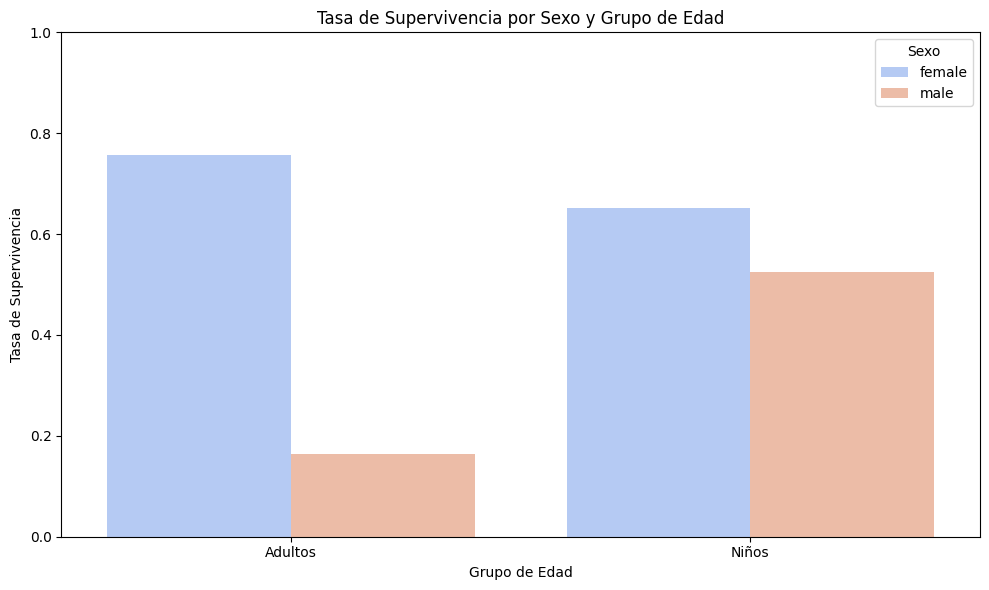

In [9]:
# 2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...

# En esa ocasión, los datos respaldan que se siguió la política de "Mujeres y niños primero", pero no de forma igualitaria para todos.

# Crear categorías de "Niños" (menores de 16 años) y adultos
df_titanic["grupo_edad"] = df_titanic["age"].apply(lambda x: "Niños" if x < 16 else "Adultos")

# Calcular tasas de supervivencia por sexo y grupo de edad
survival_rates = df_titanic.groupby(["sex", "grupo_edad"])["survived"].mean().reset_index()

# Visualizar los datos
fig = plt.figure(figsize=(10, 6))
sns.barplot(data=survival_rates, x="grupo_edad", y="survived", hue="sex", palette="coolwarm")
plt.title("Tasa de Supervivencia por Sexo y Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Tasa de Supervivencia")
plt.ylim(0, 1)
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


In [10]:
fig.savefig('./data/grafico2.png')

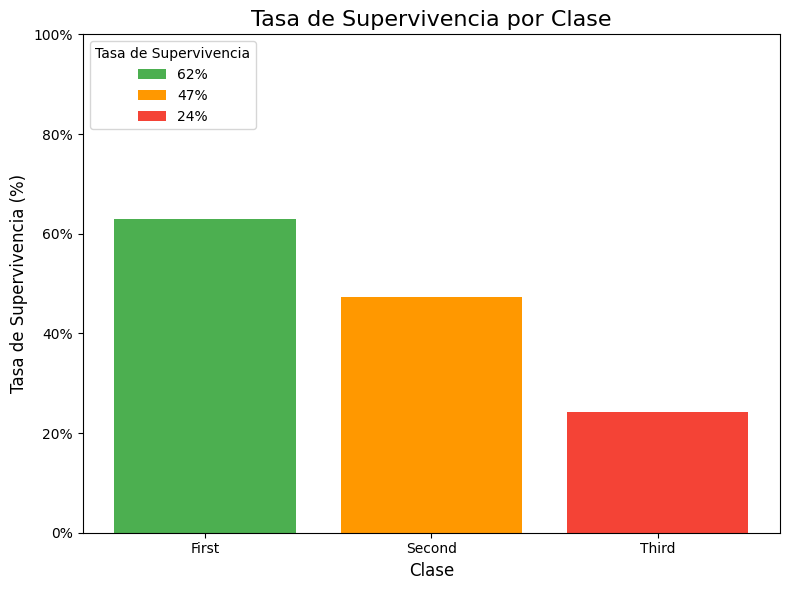

In [11]:
# 3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...

# La clase en la que se viajaba tuvo una influencia significativa en la supervivencia, lo que podría explicar las diferencias observadas.

# Calcular tasas de supervivencia por clase
survival_by_class = df_titanic.groupby("class")["survived"].mean().reset_index()

# Crear una nueva columna con el porcentaje de supervivencia
survival_by_class["porcentaje_supervivientes"] = survival_by_class["survived"] * 100

# Configuración de colores para cada clase
colors = ["#4caf50", "#ff9800", "#f44336"]  # Verde, Naranja, Rojo

# Visualizar los datos
fig = plt.figure(figsize=(8, 6))
bars = plt.bar(
    survival_by_class["class"], 
    survival_by_class["survived"], 
    color=colors
)

# Ajustar el gráfico
plt.title("Tasa de Supervivencia por Clase", fontsize=16)
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Tasa de Supervivencia (%)", fontsize=12)
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y * 100)}%'))  # Mostrar porcentaje en el eje Y

# Crear la leyenda manualmente
for bar, perc in zip(bars, survival_by_class["porcentaje_supervivientes"]):
    bar.set_label(f"{int(perc)}%")
plt.legend(title="Tasa de Supervivencia", loc="upper left")

plt.tight_layout()
plt.show()


In [12]:
fig.savefig('./data/grafico3.png')

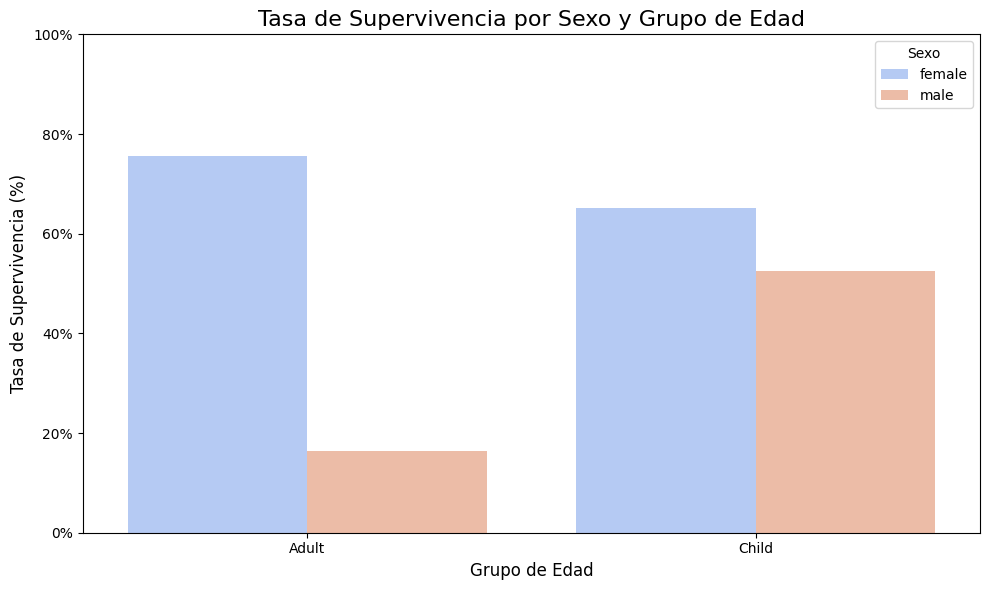

In [13]:
# 4- ... las diferencias de tasas de supervivencia entre mujeres y niños.   

# Las tasas de supervivencia muestran diferencias notables entre mujeres, hombres y niños. Las mujeres tuvieron mayores probabilidades de sobrevivir, seguidas de los niños, con los hombres en último lugar.

# Crear una nueva columna para identificar a los niños
df_titanic["age_group"] = df_titanic["age"].apply(lambda x: "Child" if x < 16 else "Adult")

# Calcular tasas de supervivencia por sexo y grupo de edad
survival_rates = (
    df_titanic.groupby(["sex", "age_group"])["survived"]
    .mean()
    .reset_index()
    .rename(columns={"sex": "Sexo", "age_group": "Grupo de Edad", "survived": "Tasa de Supervivencia"})
)

# Visualizar los datos
fig = plt.figure(figsize=(10, 6))
sns.barplot(
    data=survival_rates,
    x="Grupo de Edad",
    y="Tasa de Supervivencia",
    hue="Sexo",
    palette="coolwarm"
)
plt.title("Tasa de Supervivencia por Sexo y Grupo de Edad", fontsize=16)
plt.xlabel("Grupo de Edad", fontsize=12)
plt.ylabel("Tasa de Supervivencia (%)", fontsize=12)
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y * 100)}%'))  # Eje Y en porcentaje
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


In [14]:
fig.savefig('./data/grafico4.png')

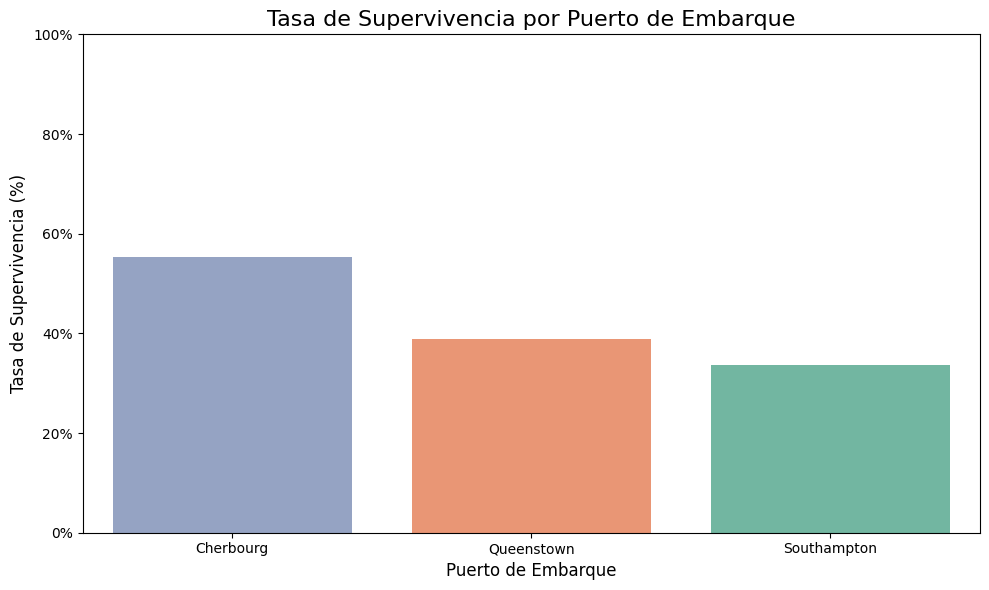

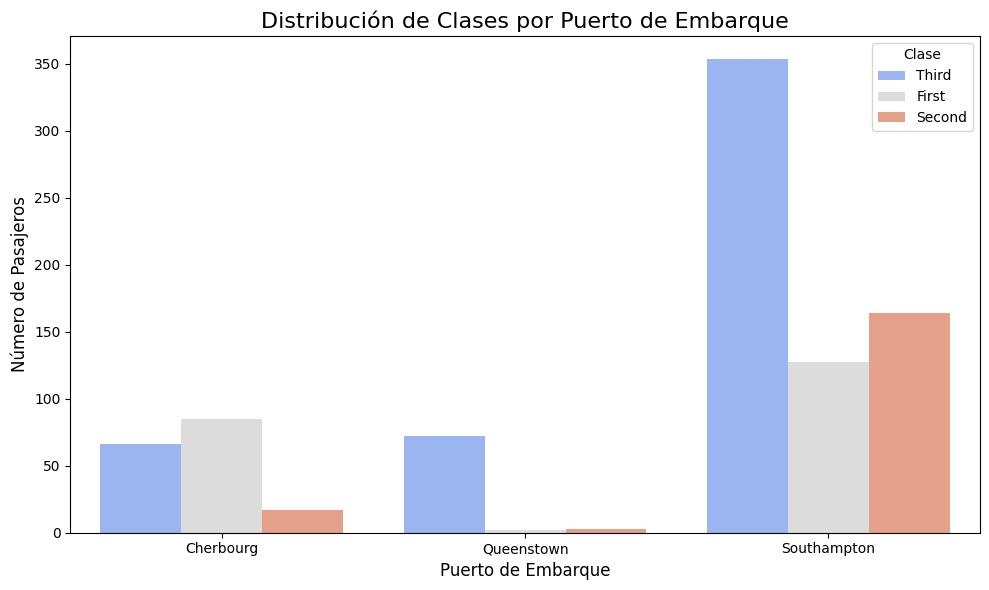

In [15]:
# 5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

# Aunque el puerto de embarque parece influir en las tasas de supervivencia, los datos sugieren que esto podría estar relacionado con el tipo de pasaje y las clases de los pasajeros que embarcaron en cada uno.

# Calcular tasas de supervivencia por puerto de embarque
survival_by_port = df_titanic.groupby("embarked")["survived"].mean().reset_index()

# Agregar una columna para las etiquetas de los puertos
port_labels = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
survival_by_port["Puerto"] = survival_by_port["embarked"].map(port_labels)

# Gráfico 1: Tasas de Supervivencia por Puerto
fig1 = plt.figure(figsize=(10, 6))
sns.barplot(
    data=survival_by_port,
    x="Puerto",
    y="survived",
    hue="survived",
    legend=False,
    palette="Set2"
)
plt.title("Tasa de Supervivencia por Puerto de Embarque", fontsize=16)
plt.xlabel("Puerto de Embarque", fontsize=12)
plt.ylabel("Tasa de Supervivencia (%)", fontsize=12)
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y * 100)}%'))
plt.tight_layout()
plt.show()

# Gráfico 2: Distribución de Clases por Puerto
fig2 = plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_titanic,
    x="embarked",
    hue="class",
    palette="coolwarm",
    order=["C", "Q", "S"]
)
plt.title("Distribución de Clases por Puerto de Embarque", fontsize=16)
plt.xlabel("Puerto de Embarque", fontsize=12)
plt.ylabel("Número de Pasajeros", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Cherbourg", "Queenstown", "Southampton"])
plt.legend(title="Clase")
plt.tight_layout()
plt.show()


In [16]:
fig1.savefig('./data/grafico5-1.png')

In [17]:
fig2.savefig('./data/grafico5-2.png')